# Lending Club Case Study

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Business Objective: Determinants of Default
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

#reading the data
df = pd.read_csv("loan.csv")
df_dist = pd.read_excel("Data_Dictionary.xlsx")

### OverView of data set
It contains the complete loan data for all loans issued through the time period 2007 t0 2011.

And the dictionary meaning of data set

Understanding of data set shape etc.

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df_dist.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [5]:
#Finding shape of data set
df.shape

(39717, 111)

### Lets check the Null values present in the data set

In [6]:
# check how many rows have all missing values

print('Empty rows present in data set :')
print(df.isnull().all(axis=1).sum())

# check how many columns have all missing values

print('Empty Columns in data set:')
print(df.isnull().all(axis=0).sum())


Empty rows present in data set :
0
Empty Columns in data set:
54


#### Observation : There are "columns = 54" & "Rows = 0" have all missing values.

## Data Cleaning 
### By removing all coloumns having null Values 

In [7]:
df.dropna(axis = 1, how = 'all', inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Lets check coloumns information 

So after remvoing the colomns whhich contain all null values we left with 57 coloumns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
#Finding number of unique values in each vcolumn
df.nunique().sort_values().head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
term                          2
dtype: int64

### Missing values check

In [10]:
(df.isna().sum()/len(df.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


## List of not usefull data
 List :
1. member_id -  We will use only id as refrence of unique client so no sue of it.
2. pymnt_plan
3. url - No use of url
4. desc - It contain reason only
5. zip_code - No use in data analysis 
6. addr_state - client address 
7. delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years so it is not in use
8. mths_since_last_delinq - 60% data not available
9. mths_since_last_record - 92% data not available
10. initial_list_status
11. out_prncp
12. out_prncp_inv
13. next_pymnt_d - 97% data not available
14. collections_12_mths_ex_med
15. policy_code - no unique
16. application_type- only Individual type so no unique
17. acc_now_delinq
18. chargeoff_within_12_mths - no data
19. delinq_amnt
20. tax_liens

In [11]:
# So we will remove the not usefull data from the data set
columns_list = ["member_id","pymnt_plan","url","desc","zip_code","addr_state","delinq_2yrs","mths_since_last_delinq","mths_since_last_record","out_prncp","out_prncp_inv","next_pymnt_d","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"]
df.drop(labels = columns_list, axis =1, inplace=True)

Text(0.5, 1.0, 'Average Overall Default rate %')

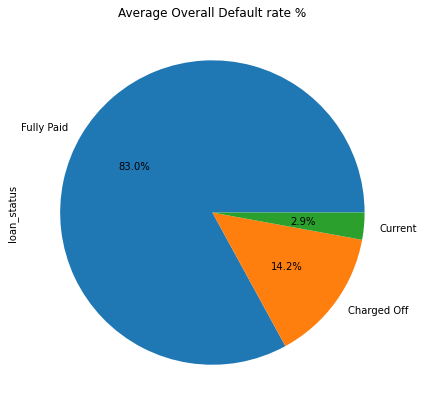

In [12]:
loan_status_per =(df.loan_status.value_counts()*100)/len(df)
loan_status_per.plot.pie(autopct='%1.1f%%',figsize=(12,7))
plt.title("Average Overall Default rate %")

### Average overall default rates :
#### Fully paid : 83%
#### Charged off : 14.2%
#### Current : 2.9%
#### From above plots we can see that average default rate across all categories is 14.4%

### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans

In [13]:
## Removing clients from data set 

df = df[df.loan_status != "Current"]
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Text(0.5, 1.0, 'Average Overall Default rate %')

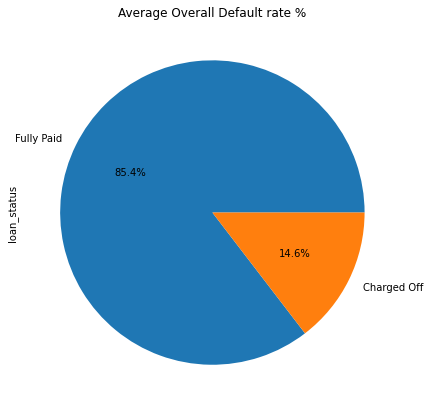

In [14]:
loan_status_per1 =(df.loan_status.value_counts()*100)/len(df)
loan_status_per1.plot.pie(autopct='%1.1f%%',figsize=(12,7))
plt.title("Average Overall Default rate %")


## Observation 
#### So for us only important factors are Fully paid and charged off for comparison 
#### Fully paid : 83%
#### Charged off : 14.2%

In [15]:
(df.isna().sum()/len(df.index))*100

id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
dti                        0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.129611
total_acc                  0.000000
initial_list_status        0.000000
total_pymnt                0

In [16]:
df.shape

(38577, 38)

### Observation 
So now after data cleaniing we left with row and coloumns (39717, 38)

## Data Standardize

In [17]:
# Data cleaning
# Let`s format employment length column to have only numbers. It may play important role in analysis further.

df.emp_length.fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)')
df.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65,Jan-85,1,3,0,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,Apr-99,5,3,0,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


In [18]:
# Data cleaning
# pub_rec_bankruptcies can be cleaned for further analysis.
print("Before cleaning:")
print(df.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(df.pub_rec_bankruptcies.isnull().sum())

Before cleaning:
697
After cleaning:
0


In [19]:
# Data cleaning
# Lets remove % symbol from intrest rate column so that it can be used in calculations
df['int_rate'] = df['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [20]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65,Jan-85,1,3,0,13648,83.70,9,f,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,Apr-99,5,3,0,1687,9.40,4,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.72,Nov-01,2,2,0,2956,98.50,10,f,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,Feb-96,1,10,0,5598,21,37,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,Nov-04,3,9,0,7963,28.30,12,f,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [21]:
# convert amount columns into numeric data to find some correlation among important ones.

cols1 = ['loan_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
df[cols1] = df[cols1].apply(pd.to_numeric)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_inv          38577 non-null  float64
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  float64
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_title                36191 non-null  object 
 10  emp_length               38577 non-null  int64  
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d               

###  Derive Columns For Analysis

In [23]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

df.head(5)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,27.65,Jan-85,1,3,0,13648,83.70,9,f,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,1.00,Apr-99,5,3,0,1687,9.40,4,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,8.72,Nov-01,2,2,0,2956,98.50,10,f,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,20.00,Feb-96,1,10,0,5598,21,37,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,2011,12
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,Nov-04,3,9,0,7963,28.30,12,f,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,2011,12


## Outlier Treatment

#### 1. annual_inc

<AxesSubplot:xlabel='annual_inc'>

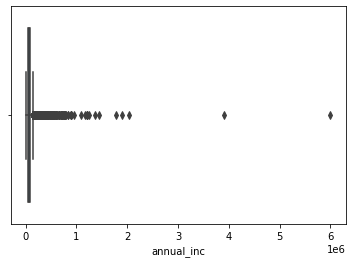

In [24]:
sns.boxplot(df.annual_inc)

### Clearly indincating the presence of outliers.
So, Removing them.
Let's see the quantile info and take an appropriate action.
#### The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
#### considering threshold for removing outliers as 0.95

In [25]:
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [26]:
per_95_annual_inc = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

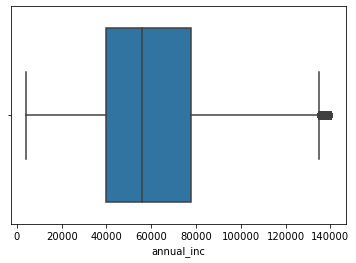

In [27]:
sns.boxplot(df.annual_inc)

### Observation : now annual income data presentable

### 2.loan_amnt

In [28]:
# Basic statistics with .describe() - Quantitative Variables
df['loan_amnt'].describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

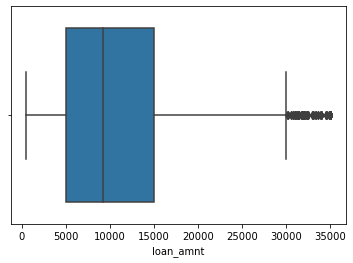

In [29]:
sns.boxplot(df.loan_amnt)

### 3. Intrest rate

In [30]:
df['int_rate'].describe()

count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

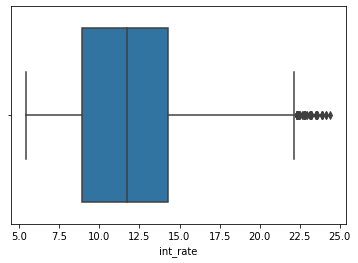

In [31]:
sns.boxplot(df.int_rate)

### Average intrest rate is 12 %
### after 75% percentile interest rate zoom to 25% from 15%.

### 4. funded amount investment 

<AxesSubplot:xlabel='funded_amnt_inv'>

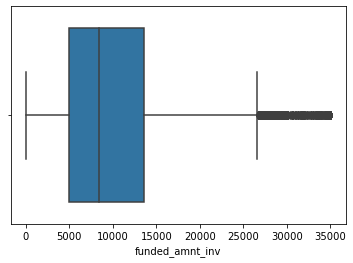

In [32]:
sns.boxplot(df.funded_amnt_inv)

### dti

<AxesSubplot:xlabel='dti'>

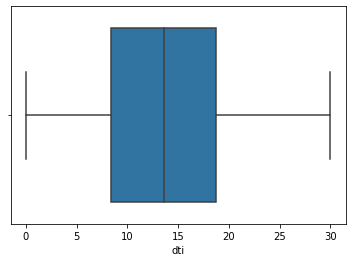

In [33]:
sns.boxplot(df.dti)

## Extra Data cleanising


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       36654 non-null  int64         
 1   loan_amnt                36654 non-null  int64         
 2   funded_amnt              36654 non-null  int64         
 3   funded_amnt_inv          36654 non-null  float64       
 4   term                     36654 non-null  object        
 5   int_rate                 36654 non-null  float64       
 6   installment              36654 non-null  float64       
 7   grade                    36654 non-null  object        
 8   sub_grade                36654 non-null  object        
 9   emp_title                34451 non-null  object        
 10  emp_length               36654 non-null  int64         
 11  home_ownership           36654 non-null  object        
 12  annual_inc               36654 n

###### Removing not useful data
id: as id is generated by system and doesnt depend upon the customer profile

#### Following columns can be removed as in a application following data is not available or wont be decided by bank and thus these are not applicable to find whether the loan would be Fully paid or Charged Off

last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collection_recovery_fee, recoveries, total_rec_late_fee, total_rec_int, total_rec_prncp, total_pymnt_inv, total_pymnt, issue_d, year, month

initial_list_status as all values are f


In [380]:
df1= df.drop(columns=['id', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'total_rec_int', 'total_rec_prncp', 'total_pymnt_inv', 'total_pymnt', 'emp_title', 'issue_d', 'year', 'month', 'initial_list_status'])

## Derived data

In [381]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36654 non-null  int64  
 1   funded_amnt           36654 non-null  int64  
 2   funded_amnt_inv       36654 non-null  float64
 3   term                  36654 non-null  object 
 4   int_rate              36654 non-null  float64
 5   installment           36654 non-null  float64
 6   grade                 36654 non-null  object 
 7   sub_grade             36654 non-null  object 
 8   emp_length            36654 non-null  int64  
 9   home_ownership        36654 non-null  object 
 10  annual_inc            36654 non-null  float64
 11  verification_status   36654 non-null  object 
 12  loan_status           36654 non-null  object 
 13  purpose               36654 non-null  object 
 14  title                 36643 non-null  object 
 15  dti                

### checking for title and purpose

In [382]:
df1['title_purpose_matches']=df1[['title', 'purpose']].apply(lambda x: '1' if str(x[0]) in str(x[1]) else '0', axis=1)

#### removing title and purpose

In [383]:
df2= df1.drop(columns=['title', 'purpose'])

## removing highly correlated data 

In [384]:
df2.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
loan_amnt,1.000000,0.981942,0.936925,0.291189,0.931481,0.157385,0.403197,0.090313,0.002544,0.166234,-0.044106,0.313045,0.239080
funded_amnt,0.981942,1.000000,0.954850,0.296182,0.957113,0.156951,0.399030,0.089510,0.003082,0.164243,-0.044782,0.305021,0.233851
funded_amnt_inv,0.936925,0.954850,1.000000,0.288787,0.902641,0.165375,0.382429,0.097070,-0.011793,0.151745,-0.046327,0.285537,0.226394
int_rate,0.291189,0.296182,0.288787,1.000000,0.269193,0.008929,0.054022,0.111683,0.133788,-0.007917,0.103767,0.080672,-0.064017
installment,0.931481,0.957113,0.902641,0.269193,1.000000,0.130706,0.398193,0.079392,0.001526,0.160925,-0.040177,0.305355,0.212378
emp_length,0.157385,0.156951,0.165375,0.008929,0.130706,1.000000,0.213849,0.057091,0.010210,0.099393,0.054669,0.159645,0.205190
annual_inc,0.403197,0.399030,0.382429,0.054022,0.398193,0.213849,1.000000,-0.072641,0.030321,0.265207,-0.008935,0.397880,0.386628
dti,0.090313,0.089510,0.097070,0.111683,0.079392,0.057091,-0.072641,1.000000,0.008224,0.298322,-0.006893,0.270817,0.245853
inq_last_6mths,0.002544,0.003082,-0.011793,0.133788,0.001526,0.010210,0.030321,0.008224,1.000000,0.091891,0.026893,-0.026602,0.109351
open_acc,0.166234,0.164243,0.151745,-0.007917,0.160925,0.099393,0.265207,0.298322,0.091891,1.000000,0.005308,0.286150,0.684071


In [385]:
df2.corr()[df1.corr()>0.8]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
loan_amnt,1.000000,0.981942,0.936925,NaN,0.931481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.981942,1.000000,0.954850,NaN,0.957113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.936925,0.954850,1.000000,NaN,0.902641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.931481,0.957113,0.902641,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
open_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


following are the pairs:
loan_amnt--funded_amnt--funded_amnt_inv--installment (also, this can be accepted as the installment is calculated from loan amnt)

In [466]:
df3=df2.drop(columns=['funded_amnt', 'funded_amnt_inv', 'installment'])

In [467]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36654 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              36654 non-null  int64  
 1   term                   36654 non-null  object 
 2   int_rate               36654 non-null  float64
 3   grade                  36654 non-null  object 
 4   sub_grade              36654 non-null  object 
 5   emp_length             36654 non-null  int64  
 6   home_ownership         36654 non-null  object 
 7   annual_inc             36654 non-null  float64
 8   verification_status    36654 non-null  object 
 9   loan_status            36654 non-null  object 
 10  dti                    36654 non-null  float64
 11  earliest_cr_line       36654 non-null  object 
 12  inq_last_6mths         36654 non-null  int64  
 13  open_acc               36654 non-null  int64  
 14  pub_rec                36654 non-null  int64  
 15  re

In [468]:
df3.dropna(inplace=True)     #as only 48 rows are with na values, so better to drop them

In [469]:
df3.reset_index(inplace=True)

In [470]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36606 entries, 0 to 36605
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  36606 non-null  int64  
 1   loan_amnt              36606 non-null  int64  
 2   term                   36606 non-null  object 
 3   int_rate               36606 non-null  float64
 4   grade                  36606 non-null  object 
 5   sub_grade              36606 non-null  object 
 6   emp_length             36606 non-null  int64  
 7   home_ownership         36606 non-null  object 
 8   annual_inc             36606 non-null  float64
 9   verification_status    36606 non-null  object 
 10  loan_status            36606 non-null  object 
 11  dti                    36606 non-null  float64
 12  earliest_cr_line       36606 non-null  object 
 13  inq_last_6mths         36606 non-null  int64  
 14  open_acc               36606 non-null  int64  
 15  pu

# Univariate Analysis


In [471]:
?sns.scatterplot

<AxesSubplot:ylabel='loan_amnt'>

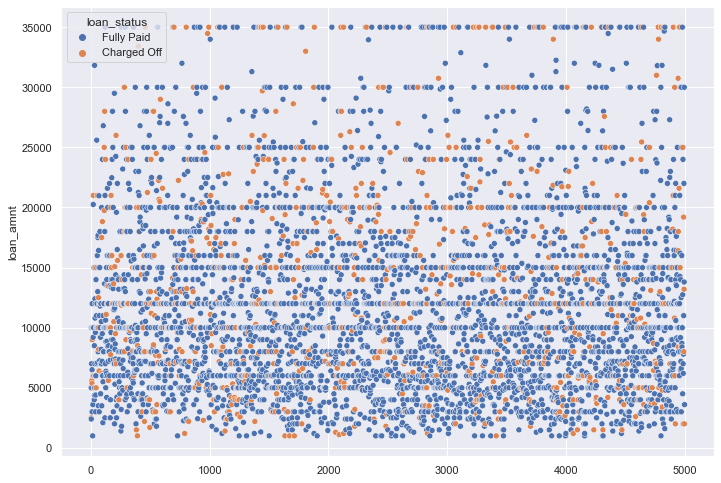

In [472]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=df3.index[:5000], y=df3.loan_amnt[:5000], hue=df3.loan_status[:5000])

From the graph we cannot find any information as it is not following any trend and is scattered


In [473]:
?sns.histplot

<AxesSubplot:xlabel='loan_amnt', ylabel='Percent'>

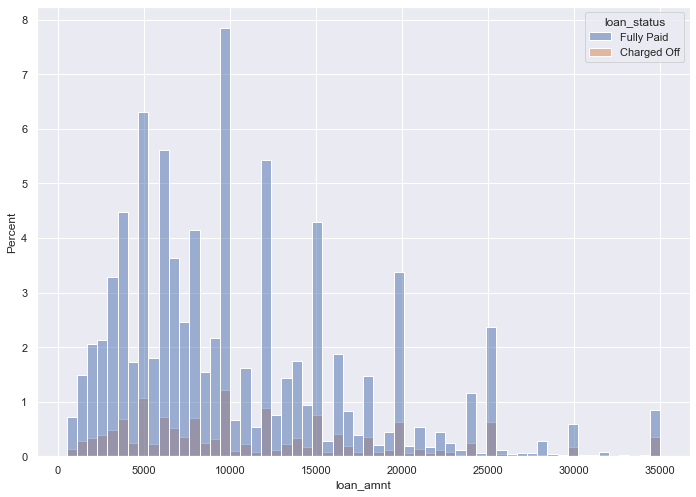

In [474]:
sns.histplot(x=df3.loan_amnt, hue=df3.loan_status, stat="percent")

From the graph we cannot find any useful information


<AxesSubplot:xlabel='term', ylabel='Percent'>

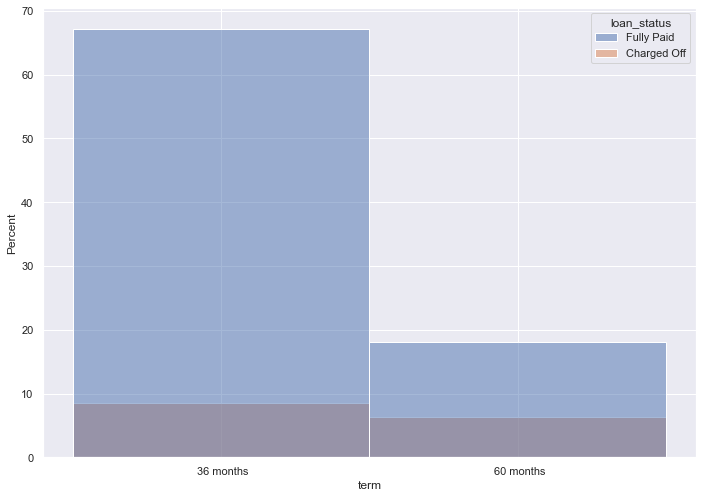

In [475]:
sns.histplot(x=df3.term, hue=df3.loan_status, stat="percent")

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

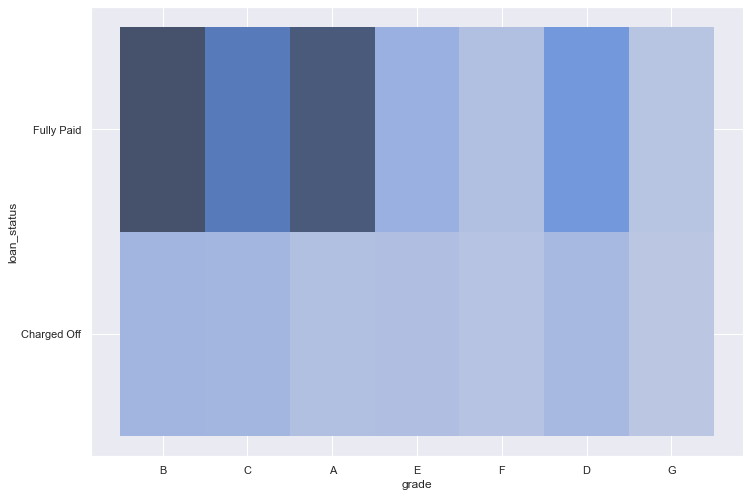

In [476]:
sns.histplot(x=df3.grade, y=df3.loan_status, stat="density")

In [477]:
df3.groupby('grade')['loan_status'].value_counts(normalize=True)

grade  loan_status
A      Fully Paid     0.938524
       Charged Off    0.061476
B      Fully Paid     0.875991
       Charged Off    0.124009
C      Fully Paid     0.823088
       Charged Off    0.176912
D      Fully Paid     0.776556
       Charged Off    0.223444
E      Fully Paid     0.730817
       Charged Off    0.269183
F      Fully Paid     0.675369
       Charged Off    0.324631
G      Fully Paid     0.640927
       Charged Off    0.359073
Name: loan_status, dtype: float64

From the above graph and calculation, it is clear that as sub grade decreases, then the chances of loan getting charged off increases

<AxesSubplot:xlabel='sub_grade', ylabel='loan_status'>

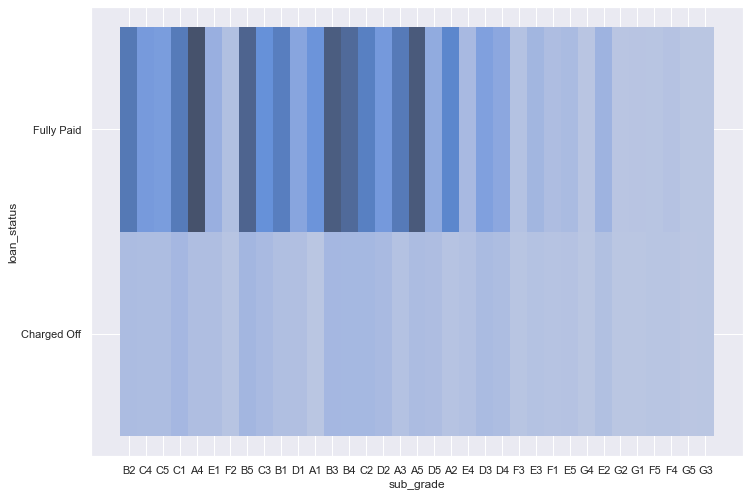

In [478]:
sns.histplot(x=df3.sub_grade, y=df3.loan_status, stat="percent", common_norm=False)

In [479]:
df3.groupby('sub_grade')['loan_status'].value_counts(normalize=True)

sub_grade  loan_status
A1         Fully Paid     0.972678
           Charged Off    0.027322
A2         Fully Paid     0.949001
           Charged Off    0.050999
A3         Fully Paid     0.941109
           Charged Off    0.058891
A4         Fully Paid     0.937068
           Charged Off    0.062932
A5         Fully Paid     0.918045
           Charged Off    0.081955
B1         Fully Paid     0.903376
           Charged Off    0.096624
B2         Fully Paid     0.885729
           Charged Off    0.114271
B3         Fully Paid     0.877167
           Charged Off    0.122833
B4         Fully Paid     0.863266
           Charged Off    0.136734
B5         Fully Paid     0.860353
           Charged Off    0.139647
C1         Fully Paid     0.832824
           Charged Off    0.167176
C2         Fully Paid     0.830076
           Charged Off    0.169924
C3         Fully Paid     0.811574
           Charged Off    0.188426
C4         Fully Paid     0.818891
           Charged Off    0.1811

From the above graph and calculation, it is clear that as sub grade decreases, then the chances of loan getting charged off increases

<AxesSubplot:xlabel='emp_length', ylabel='Percent'>

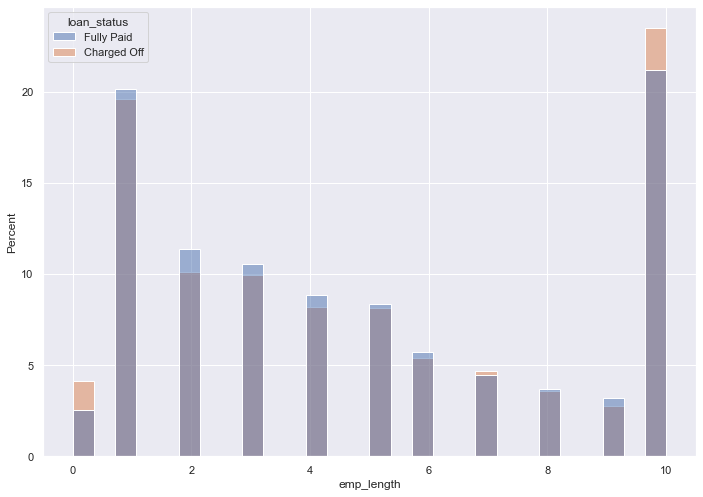

In [480]:
sns.histplot(x=df3.emp_length , hue=df3.loan_status, stat="percent", common_norm=False)

In [481]:
df3.groupby('emp_length')['loan_status'].value_counts(normalize=True)

emp_length  loan_status
0           Fully Paid     0.778437
            Charged Off    0.221563
1           Fully Paid     0.855958
            Charged Off    0.144042
2           Fully Paid     0.866699
            Charged Off    0.133301
3           Fully Paid     0.859686
            Charged Off    0.140314
4           Fully Paid     0.861929
            Charged Off    0.138071
5           Fully Paid     0.855263
            Charged Off    0.144737
6           Fully Paid     0.858937
            Charged Off    0.141063
7           Fully Paid     0.846435
            Charged Off    0.153565
8           Fully Paid     0.856185
            Charged Off    0.143815
9           Fully Paid     0.869905
            Charged Off    0.130095
10          Fully Paid     0.839102
            Charged Off    0.160898
Name: loan_status, dtype: float64

only for 0 experience the charged off percentage is more than 20, for the rest it is increasing slowly with experience (maybe as less experience people are bachelors thus less responsibilty, and more experience are with family)

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

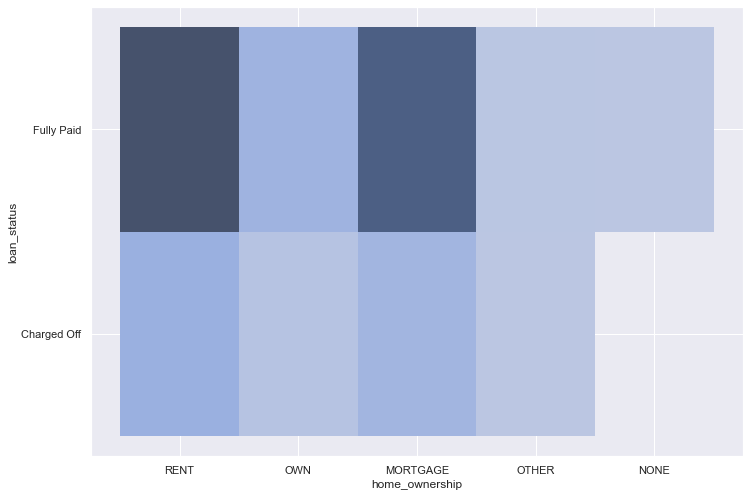

In [482]:
sns.histplot(x=df3.home_ownership , y=df3.loan_status, stat="percent")

In [483]:
df3.groupby('home_ownership')['loan_status'].value_counts(normalize=True)

home_ownership  loan_status
MORTGAGE        Fully Paid     0.860198
                Charged Off    0.139802
NONE            Fully Paid     1.000000
OTHER           Fully Paid     0.813187
                Charged Off    0.186813
OWN             Fully Paid     0.848261
                Charged Off    0.151739
RENT            Fully Paid     0.846500
                Charged Off    0.153500
Name: loan_status, dtype: float64

people with no home have no 0 charge off, maybe its due to that others have to pay some sort of tax or mortagage fees, thus adding a liability

In [484]:
df3.groupby('annual_inc')['loan_status'].value_counts(normalize=True)

annual_inc  loan_status
4000.0      Fully Paid     1.000000
4080.0      Charged Off    1.000000
4200.0      Fully Paid     1.000000
4800.0      Fully Paid     1.000000
5000.0      Fully Paid     1.000000
                             ...   
139992.0    Fully Paid     1.000000
140000.0    Fully Paid     0.900000
            Charged Off    0.100000
140004.0    Fully Paid     0.833333
            Charged Off    0.166667
Name: loan_status, Length: 5376, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Percent'>

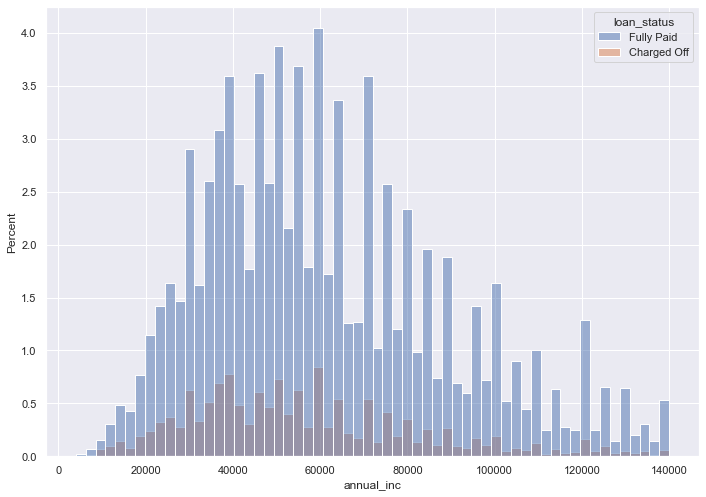

In [485]:
sns.histplot(x=df3.annual_inc , hue=df3.loan_status, stat="percent")

No trend with respect to loan status and annual income

<AxesSubplot:xlabel='verification_status', ylabel='Percent'>

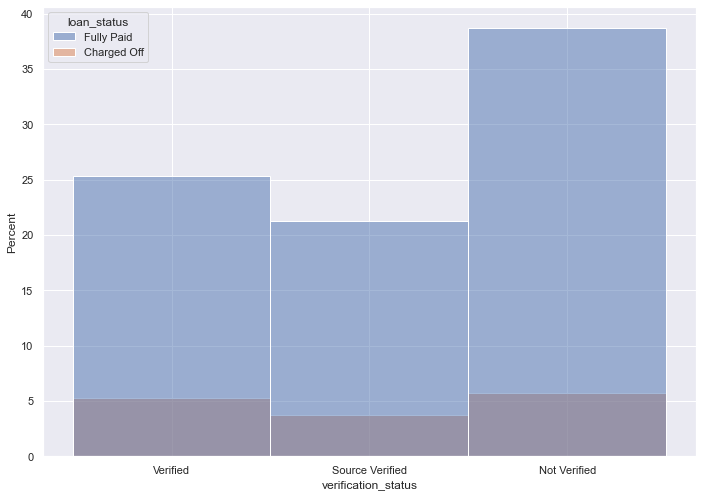

In [486]:
sns.histplot(x=df3.verification_status , hue=df3.loan_status, stat="percent")

In [487]:
df3.groupby('verification_status')['loan_status'].value_counts(normalize=True)

verification_status  loan_status
Not Verified         Fully Paid     0.871470
                     Charged Off    0.128530
Source Verified      Fully Paid     0.850175
                     Charged Off    0.149825
Verified             Fully Paid     0.826657
                     Charged Off    0.173343
Name: loan_status, dtype: float64

all verification status have similar percentage of charged off, so no information

In [488]:
df3.groupby('dti')['loan_status'].value_counts(normalize=True)

dti    loan_status
0.00   Fully Paid     0.834356
       Charged Off    0.165644
0.01   Charged Off    0.500000
       Fully Paid     0.500000
0.02   Fully Paid     1.000000
                        ...   
29.88  Fully Paid     1.000000
29.89  Fully Paid     1.000000
29.92  Fully Paid     1.000000
29.93  Fully Paid     1.000000
29.99  Fully Paid     1.000000
Name: loan_status, Length: 5005, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Percent'>

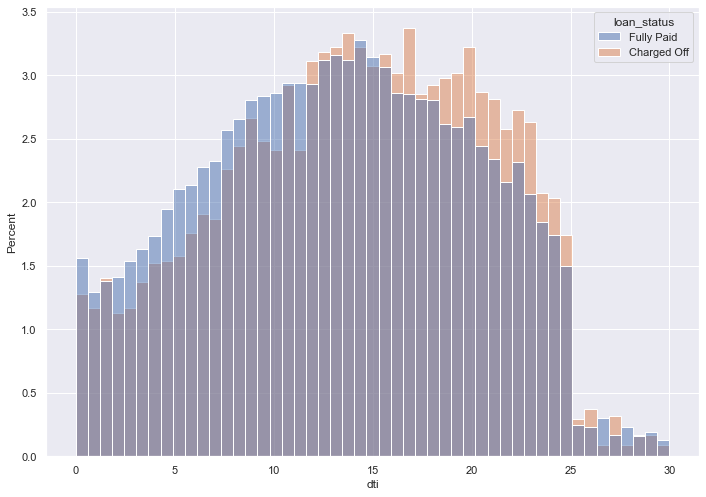

In [489]:
sns.histplot(x=df3.dti , hue=df3.loan_status, stat="percent", common_norm=False)

charged off tends to increase when dti increases 

In [490]:
df3['cr_year'] = df3['earliest_cr_line'].apply(lambda x: x.split("-")[-1])

In [491]:
df3.drop(columns=['earliest_cr_line'], inplace=True)

In [493]:
df3.cr_year.value_counts()

00    3058
99    2785
98    2652
01    2405
97    2274
96    2074
95    1932
02    1851
94    1802
03    1784
04    1702
05    1452
93    1349
06    1141
92     943
90     902
91     851
89     759
07     693
88     644
87     522
86     449
85     393
84     344
83     286
82     197
81     159
80     158
08     150
78     148
79     137
77      97
76      87
75      74
74      58
73      55
70      47
72      44
71      38
69      34
67      17
68      16
63      10
66       9
65       6
62       5
64       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: cr_year, dtype: int64

extraxted year from earliest_cr_method as it provides us with more insights and data is separated by large years

In [499]:
df3.groupby('cr_year')['loan_status'].value_counts(normalize=True).sort_values()

cr_year  loan_status
76       Charged Off    0.045977
74       Charged Off    0.086207
69       Charged Off    0.088235
63       Charged Off    0.100000
80       Charged Off    0.101266
86       Charged Off    0.115813
75       Charged Off    0.121622
84       Charged Off    0.122093
03       Charged Off    0.124439
90       Charged Off    0.125277
81       Charged Off    0.125786
71       Charged Off    0.131579
04       Charged Off    0.132197
92       Charged Off    0.133616
77       Charged Off    0.134021
02       Charged Off    0.135062
93       Charged Off    0.137880
96       Charged Off    0.137898
87       Charged Off    0.137931
89       Charged Off    0.138340
94       Charged Off    0.143174
01       Charged Off    0.145530
95       Charged Off    0.148033
70       Charged Off    0.148936
98       Charged Off    0.149698
99       Charged Off    0.151526
91       Charged Off    0.153937
88       Charged Off    0.155280
78       Charged Off    0.155405
82       Charged Off  

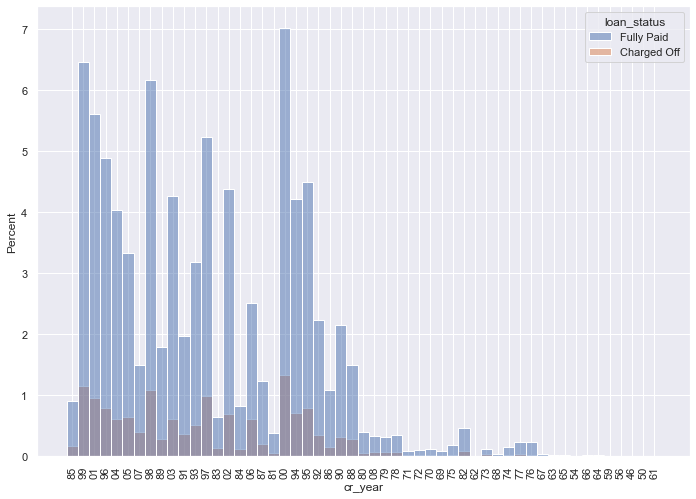

In [500]:
sns.histplot(x=df3.cr_year , hue=df3.loan_status, stat="percent")
plt.xticks(rotation=90)
plt.show()

No such trend

In [503]:
df3.groupby('inq_last_6mths')['loan_status'].value_counts(normalize=True)

inq_last_6mths  loan_status
0               Fully Paid     0.877179
                Charged Off    0.122821
1               Fully Paid     0.840941
                Charged Off    0.159059
2               Fully Paid     0.829831
                Charged Off    0.170169
3               Fully Paid     0.789040
                Charged Off    0.210960
4               Fully Paid     0.824742
                Charged Off    0.175258
5               Fully Paid     0.805970
                Charged Off    0.194030
6               Fully Paid     0.732143
                Charged Off    0.267857
7               Fully Paid     0.687500
                Charged Off    0.312500
8               Fully Paid     0.700000
                Charged Off    0.300000
Name: loan_status, dtype: float64

lower the enquires higher are the chances of payment

In [505]:
df3.groupby('open_acc')['loan_status'].value_counts(normalize=True).sort_values()

open_acc  loan_status
16        Charged Off    0.117359
24        Charged Off    0.125000
22        Charged Off    0.131783
5         Charged Off    0.137612
12        Charged Off    0.137897
18        Charged Off    0.139485
7         Charged Off    0.142062
6         Charged Off    0.143204
19        Charged Off    0.143275
9         Charged Off    0.143687
13        Charged Off    0.144767
8         Charged Off    0.145782
11        Charged Off    0.147330
17        Charged Off    0.147745
23        Charged Off    0.148148
15        Charged Off    0.149382
10        Charged Off    0.153689
4         Charged Off    0.156959
14        Charged Off    0.158133
20        Charged Off    0.160643
21        Charged Off    0.161290
3         Charged Off    0.175402
30        Charged Off    0.181818
34        Charged Off    0.200000
2         Charged Off    0.205217
25        Charged Off    0.211538
26        Charged Off    0.222222
27        Charged Off    0.238095
28        Charged Off    0

<AxesSubplot:xlabel='open_acc', ylabel='Percent'>

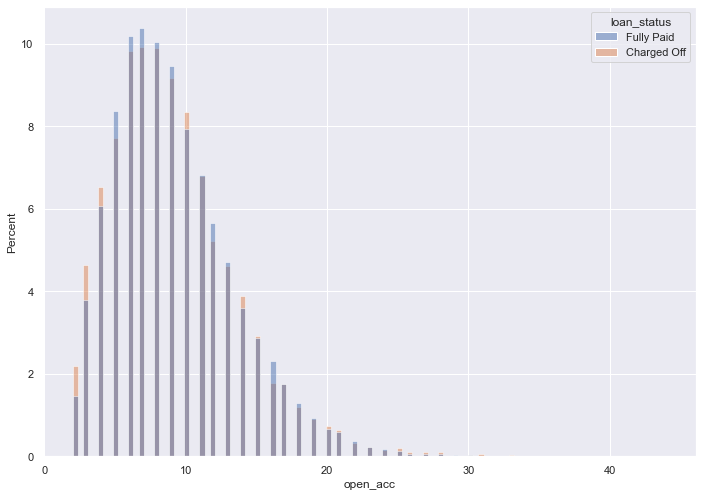

In [508]:
sns.histplot(x=df3.open_acc , hue=df3.loan_status, stat="percent", common_norm=False)


No insights as charged off and fully paid are distributed randomly

<AxesSubplot:xlabel='pub_rec', ylabel='Percent'>

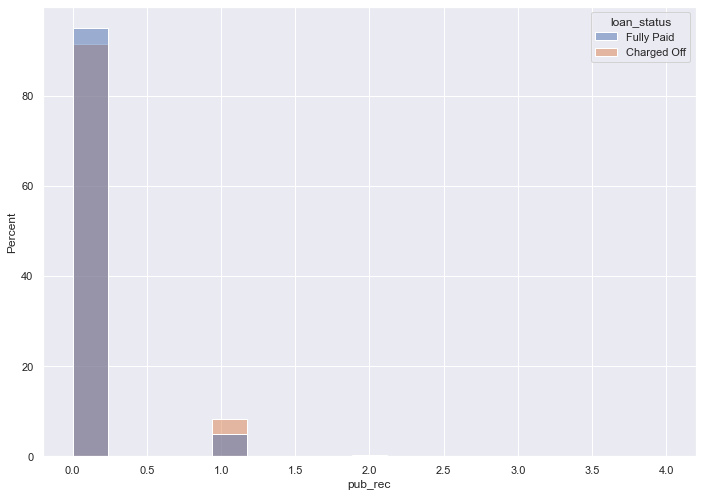

In [510]:
sns.histplot(x=df3.pub_rec , hue=df3.loan_status, stat="percent",  common_norm=False)


In [512]:
df3.groupby('pub_rec')['loan_status'].value_counts(normalize=True)

pub_rec  loan_status
0        Fully Paid     0.857093
         Charged Off    0.142907
1        Fully Paid     0.771268
         Charged Off    0.228732
2        Fully Paid     0.782609
         Charged Off    0.217391
3        Fully Paid     1.000000
4        Fully Paid     1.000000
Name: loan_status, dtype: float64

In [513]:
df3.pub_rec.value_counts()

0    34589
1     1963
2       46
3        6
4        2
Name: pub_rec, dtype: int64

from the above graphs and following analysis, for pub_rec greater than 1, the records are very less and so, they can be ignores for this analysis
from the rest, it can be infered that having a pub_rec reduces the chances of loan payment

<AxesSubplot:xlabel='revol_bal', ylabel='Percent'>

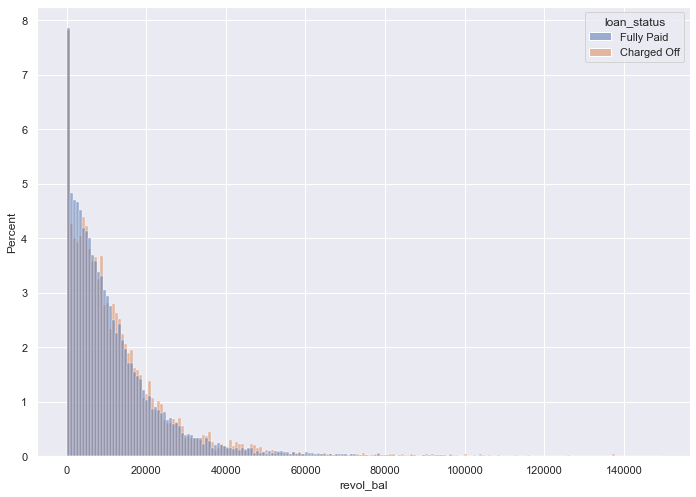

In [514]:
sns.histplot(x=df3.revol_bal , hue=df3.loan_status, stat="percent",  common_norm=False)

In [524]:
df3.revol_bal.describe()

count     36606.000000
mean      12327.672567
std       13768.939726
min           0.000000
25%        3573.250000
50%        8515.000000
75%       16163.250000
max      149000.000000
Name: revol_bal, dtype: float64

for this also, we have many outliers and the other values do not represnt the data more efficiently, so cnverting with values greater than median as 1 and rest as 0

In [526]:
df3['revol_cat'] = df3.revol_bal.apply(lambda x: '1' if x>df3.revol_bal.median() else '0')

<AxesSubplot:xlabel='revol_cat', ylabel='Percent'>

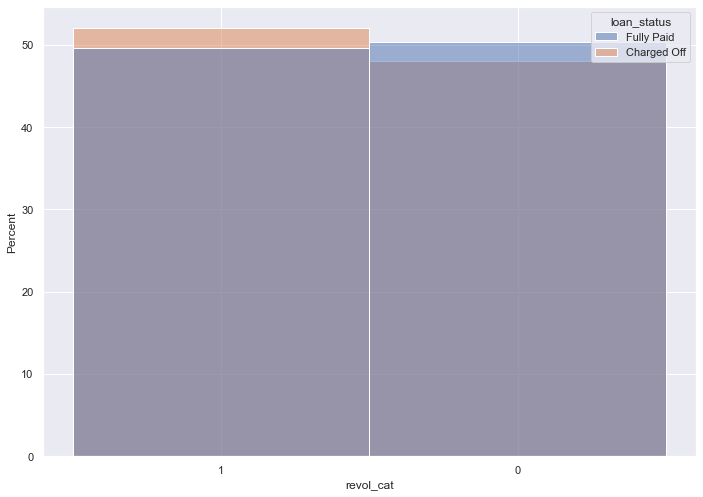

In [529]:
sns.histplot(x=df3.revol_cat , hue=df3.loan_status, stat="percent",  common_norm=False)

for revol_acc > 8515 ie the median, the charged off is higher by 5%

<AxesSubplot:xlabel='total_acc', ylabel='Percent'>

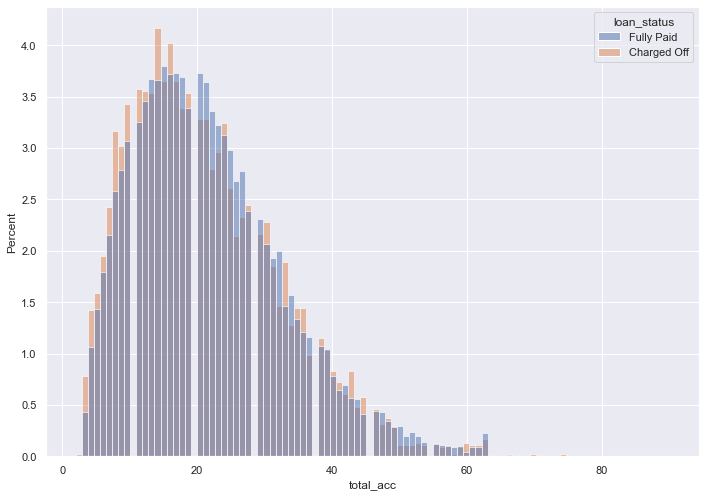

In [539]:
sns.histplot(x=df3.total_acc , hue=df3.loan_status, stat="percent", common_norm=False)

<AxesSubplot:xlabel='total_acc', ylabel='Percent'>

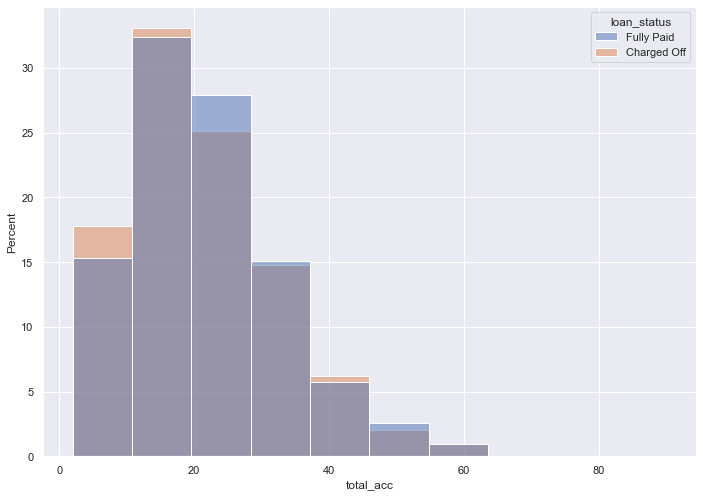

In [540]:
sns.histplot(x=df3.total_acc , hue=df3.loan_status, stat="percent", bins=10, common_norm=False)

clearly shows that having total_acc between 0 and 20, increases the chances of Charged Off

In [578]:
df3.groupby('title_purpose_matches')['loan_status'].value_counts(normalize=True)

title_purpose_matches  loan_status
0                      Fully Paid     0.852870
                       Charged Off    0.147130
1                      Fully Paid     0.815668
                       Charged Off    0.184332
Name: loan_status, dtype: float64

the difference between title and purpose has no effect aas the above gives the same result

# Bivariate Analysis

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

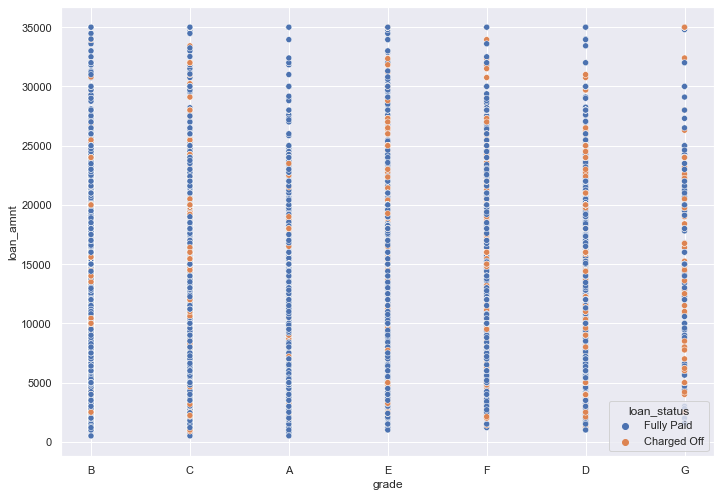

In [557]:
sns.scatterplot(y=df3.loan_amnt , x=df3.grade, hue=df3.loan_status)

even for less loan amount, but lower grade tends to Charged Off

<AxesSubplot:xlabel='int_rate', ylabel='loan_amnt'>

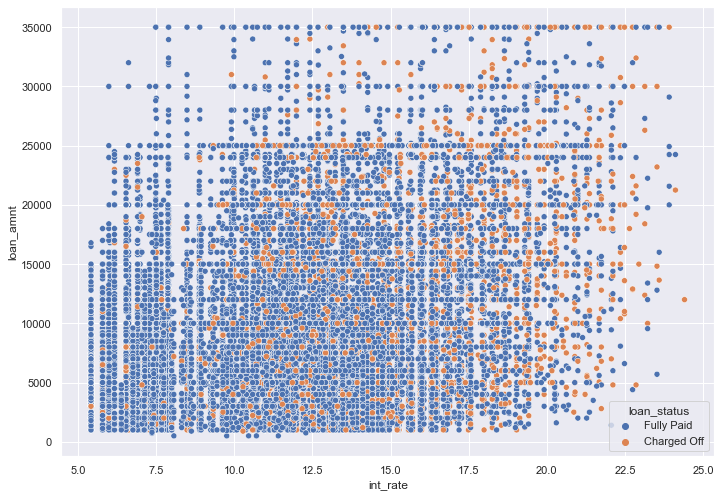

In [555]:
sns.scatterplot(y=df3.loan_amnt , x=df3.int_rate, hue=df3.loan_status)

as the loan amount increases and interest increases the instances of getting Charged Off increases


<AxesSubplot:xlabel='home_ownership', ylabel='int_rate'>

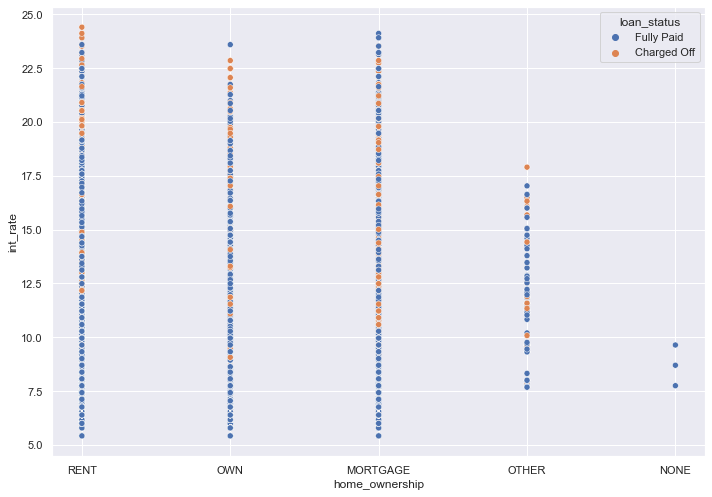

In [568]:
sns.scatterplot(y=df3.int_rate , x=df3.home_ownership, hue=df3.loan_status)

this endorses the previous assumption for home ownership, that haing loan adds to liability, which the user with higher int rate doesnt able to pay his loan back and does gets Charged OFF